In [2]:
# Install the latest version of the openai library using pip
! pip install openai -U

# Install the matplotlib library using pip (this line is currently commented out)
# ! pip install matplotlib


Simply only run the notebook cells required for the model

Using GitHub Model Marketplace - OpenAI Deloyment

In [3]:
# Import the os module, which provides a way to interact with the operating system
import os

# Import the OpenAI class from the openai library
from openai import OpenAI

# Retrieve the GitHub token from the environment variables
# The token is stored in an environment variable named "GITHUB_TOKEN" 
# For Codespaces usage this taken from your login
token = os.environ["GITHUB_TOKEN"]

# Define the endpoint URL for the AI model inference
endpoint = "https://models.inference.ai.azure.com"

# Define the name of the model to be used for inference
model_name = "gpt-4o"


In [4]:
# Import the base64 module, which provides functions for encoding and decoding data in base64 format
import base64

# Import the guess_type function from the mimetypes module
# This function is used to guess the MIME type of a file based on its filename or URL
from mimetypes import guess_type


In [5]:
def get_image_data_url(image_file: str, image_format: str) -> str:
    """
    Helper function to converts an image file to a data URL string.

    Args:
        image_file (str): The path to the image file.
        image_format (str): The format of the image file.

    Returns:
        str: The data URL of the image.
    """
    try:
        with open(image_file, "rb") as f:
            image_data = base64.b64encode(f.read()).decode("utf-8")
    except FileNotFoundError:
        print(f"Could not read '{image_file}'.")
        exit()
    return f"data:image/{image_format};base64,{image_data}"


In [ ]:
# Define the path to the image file
image_path = './imgs/demo.png'

# Convert the local image to a data URL using the local_image_to_data_url function
data_url = get_image_data_url(image_path,"png")


''
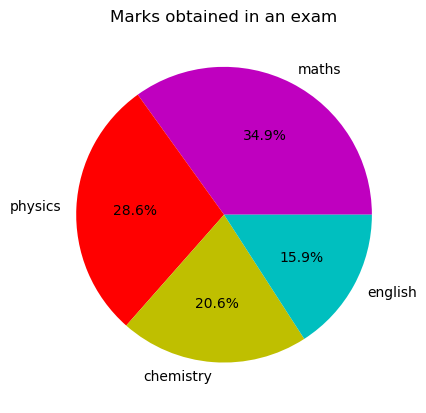

In [7]:
# The variable data_url now contains the data URL of the image
# This data URL can be used to embed the image directly in HTML or other web content
data_url

In [8]:
# Import the AzureOpenAI class from the openai library
# This class is used to interact with Azure's OpenAI Service
from openai import AzureOpenAI

Simply only run the notebook cells required for the model

Using GitHub Model - OpenAI Deployment

In [9]:
# GitHub Model Deployment 
# Create an instance of the OpenAI client to interact with the GitHub model deployment
client = OpenAI(
    # Set the base URL for the API endpoint
    base_url=endpoint,
    
    # Use the GitHub token for authentication
    api_key=token,
)

In [10]:
# Create a chat completion request using the AzureOpenAI client
response = client.chat.completions.create(
    # Specify the model to use for generating the response
    model=model_name,
    
    # Define the messages to send to the model
    messages=[
        { 
            "role": "user", 
            "content": [  
                { 
                    # Specify the type of content as text
                    "type": "text", 
                    
                    # Provide the text content for the model to process
                    "text": "Please create Python code for image, and gen code to use plt to save the new picture under imgs/ and name it gpt-4-vision.jpg." 
                },
                { 
                    # Specify the type of content as an image URL
                    "type": "image_url",
                    
                    # Provide the image URL for the model to process
                    "image_url": {
                        "url": data_url
                    }
                }
            ] 
        } 
    ],
    
    # Set the maximum number of tokens to generate in the response
    max_tokens=2000 
)


In [11]:
# Extract the content of the first choice from the response
# The response contains multiple choices, and we are accessing the first one
result = response.choices[0].message.content

In [12]:
# The variable 'result' now contains the content of the first choice from the response
# This content is the generated text or code from the model based on the input messages
result


'Below is a Python code using Matplotlib to recreate the image shown and save it under `imgs/gpt-4-vision.jpg`:\n\n```python\nimport matplotlib.pyplot as plt\n\n# Data for the pie chart\nsubjects = [\'maths\', \'physics\', \'chemistry\', \'english\']\nmarks = [35, 29, 21, 16]\ncolors = [\'magenta\', \'red\', \'yellow\', \'cyan\']\nexplode = (0.1, 0, 0, 0)  # Emphasize the \'maths\' slice\n\n# Create the pie chart\nplt.pie(marks, labels=subjects, autopct=\'%1.1f%%\', colors=colors, explode=explode)\nplt.title(\'Marks obtained in an exam\')\n\n# Create directory if it doesn\'t exist\nimport os\nif not os.path.exists(\'imgs\'):\n    os.makedirs(\'imgs\')\n\n# Save the pie chart as an image file\nplt.savefig(\'imgs/gpt-4-vision.jpg\')\n\n# Optional: Show the plot (you can comment this out if not needed)\n# plt.show()\n```\n\n### Explanation of Code:\n\n1. **Imports**:\n   - `matplotlib.pyplot` for plotting.\n   - `os` for checking and creating a directory.\n\n2. **Data**:\n   - The pie cha

In [13]:
# Initialize an empty string to store the extracted Python code
code = ''

# Find the starting index of the Python code block in the result
# The index is calculated by finding the position of the '```python' marker and adding 9 to it
begin = result.index('```python') + 9

# Extract the Python code from the result starting from the calculated index
code = result[begin:]


In [14]:
# Find the ending index of the Python code block in the extracted code
# The index is calculated by finding the position of the newline character followed by the closing code block marker '```'
end = code.index('\n```')

In [15]:
# Extract the Python code up to the ending index
# This removes the closing code block marker and any content after it
code = code[:end]

In [16]:
# The variable 'code' now contains the extracted Python code from the result
# This code can be executed or saved to a file for further use
code


"\nimport matplotlib.pyplot as plt\n\n# Data for the pie chart\nsubjects = ['maths', 'physics', 'chemistry', 'english']\nmarks = [35, 29, 21, 16]\ncolors = ['magenta', 'red', 'yellow', 'cyan']\nexplode = (0.1, 0, 0, 0)  # Emphasize the 'maths' slice\n\n# Create the pie chart\nplt.pie(marks, labels=subjects, autopct='%1.1f%%', colors=colors, explode=explode)\nplt.title('Marks obtained in an exam')\n\n# Create directory if it doesn't exist\nimport os\nif not os.path.exists('imgs'):\n    os.makedirs('imgs')\n\n# Save the pie chart as an image file\nplt.savefig('imgs/gpt-4-vision.jpg')\n\n# Optional: Show the plot (you can comment this out if not needed)\n# plt.show()"

In [17]:
# Import the subprocess module, which allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes
import subprocess


In [18]:
# Use the subprocess module to run the extracted Python code
# The 'python' command is used to execute the code
# The '-c' option allows you to pass the code as a string
# The 'capture_output' parameter is set to True to capture the output of the command
result = subprocess.run(["python", "-c", code], capture_output=True)

In [19]:
# The variable 'result' now contains the output of the subprocess command
# This includes the standard output, standard error, and the return code of the executed Python code
result


CompletedProcess(args=['python', '-c', "\nimport matplotlib.pyplot as plt\n\n# Data for the pie chart\nsubjects = ['maths', 'physics', 'chemistry', 'english']\nmarks = [35, 29, 21, 16]\ncolors = ['magenta', 'red', 'yellow', 'cyan']\nexplode = (0.1, 0, 0, 0)  # Emphasize the 'maths' slice\n\n# Create the pie chart\nplt.pie(marks, labels=subjects, autopct='%1.1f%%', colors=colors, explode=explode)\nplt.title('Marks obtained in an exam')\n\n# Create directory if it doesn't exist\nimport os\nif not os.path.exists('imgs'):\n    os.makedirs('imgs')\n\n# Save the pie chart as an image file\nplt.savefig('imgs/gpt-4-vision.jpg')\n\n# Optional: Show the plot (you can comment this out if not needed)\n# plt.show()"], returncode=0, stdout=b'', stderr=b'')

In [20]:
# Import the Image and display functions from the IPython.display module
from IPython.display import Image, display

# The Image function is used to display an image given its file path or URL
# The display function is used to display the image in the output cell of a Jupyter notebook


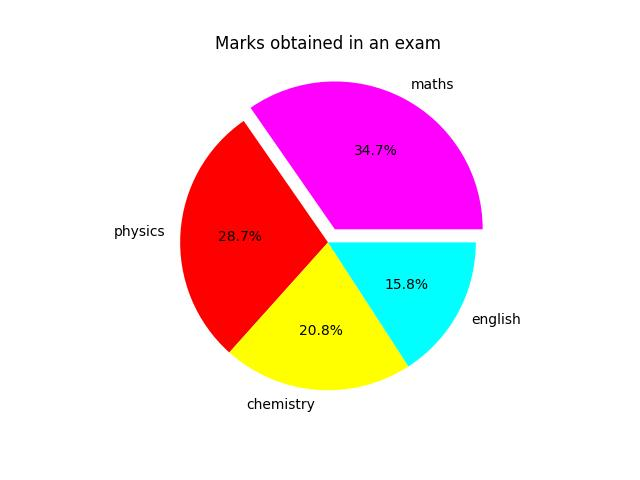

In [21]:
# The display function is used to display the output in a Jupyter notebook cell
# It takes an object as an argument and renders it
display(
    # The Image function creates an image object from a file
    # The filename parameter specifies the path to the image file
    Image(filename='./imgs/gpt-4-vision.jpg')
)